In [24]:
%reload_ext autoreload

%autoreload 2
%matplotlib inline

import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('white')

# Insertion patterns

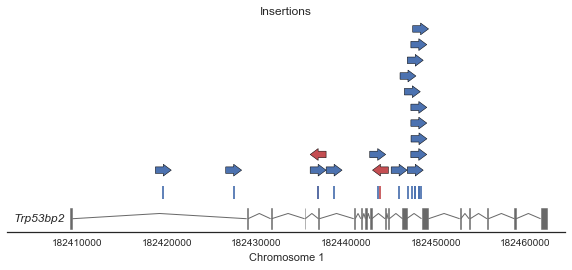

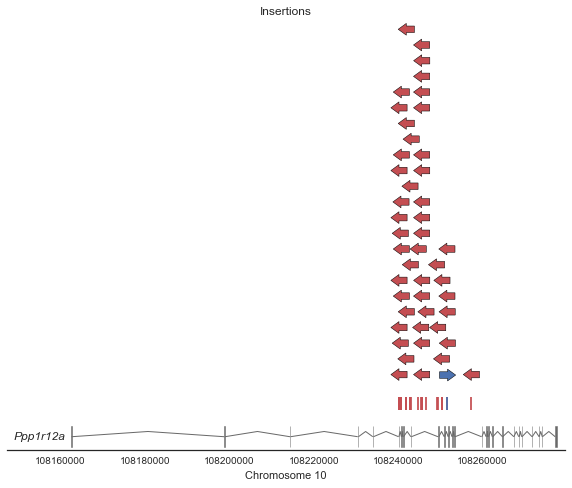

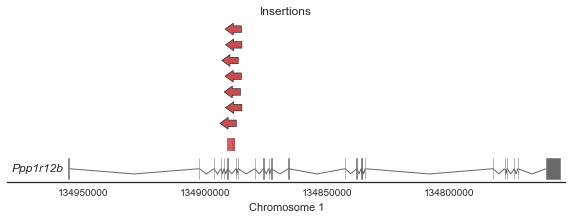

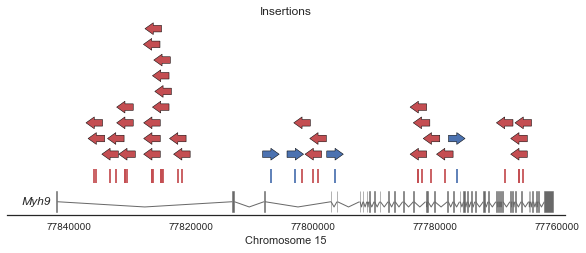

In [149]:
from nbsupport.insertions import plot_insertion_track, annotate_with_clonality

def draw_legend(color_map, ax, title='', **kwargs):
    patches = [mpatches.Patch(color=color, label=label)
               for label, color in color_map.items()]
    return ax.legend(handles=patches, title=title, **kwargs)


# Read insertions.
ins_path = ('../data/processed/sb/shear_splink/all/insertions.cis.rbm.txt')
insertions = (pd.read_csv(ins_path, sep='\t')
                .dropna(subset=['gene_name'])
                .pipe(annotate_with_clonality))

# Plot tracks for gene transcripts.
# Ppp1r12a ENSMUSG00000019907 ENSMUST00000070663
# Ppp1r12b ENSMUSG00000073557 ENSMUST00000045665
# Trp53bp2 ENSMUSG00000026510 ENSMUST00000117245
# Myh9     ENSMUSG00000022443 ENSMUST00000016771

shared_kws = {
    'figsize': (10, None),
    'ins_ratio': 1 / 30
}

# Trp53bp2
plot_insertion_track(
    insertions, region=('1', 182409172, 182462432),
    transcript_id='ENSMUST00000117245', padding=(7000, 2000), 
    reverse=False, **shared_kws);

# Ppp1r12a
plot_insertion_track(
    insertions, region=('10', 108162400, 108277575),
    transcript_id='ENSMUST00000070663', padding=(15000, 2000),
    reverse=False, **shared_kws);

# Ppp1r12b
plot_insertion_track(
    insertions, region=('1', 134754658, 134955942),
    transcript_id='ENSMUST00000045665', padding=(25000, 2000),
    reverse=True, **shared_kws);

# Myh9
plot_insertion_track(
    insertions, region=('15', 77760587, 77842175),
    transcript_id='ENSMUST00000016771', padding=(8000, 2000),
    reverse=True, **shared_kws);

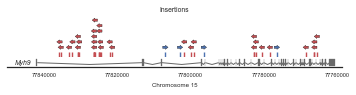

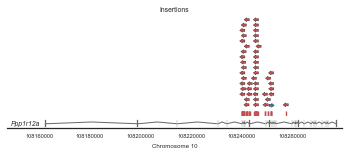

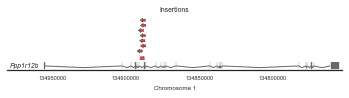

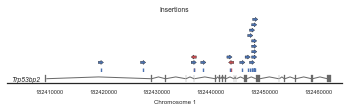

In [151]:
# Ppp1r12a ENSMUSG00000019907 ENSMUST00000070663
# Ppp1r12b ENSMUSG00000073557 ENSMUST00000045665
# Trp53bp2 ENSMUSG00000026510 ENSMUST00000117245
# Myh9     ENSMUSG00000022443 ENSMUST00000016771

with sns.plotting_context('paper', font_scale=0.7):
    # Myh9
    fig = plot_insertion_track(
        insertions, region=('15', 77760587, 77842175),
        transcript_id='ENSMUST00000016771', padding=(8000, 2000),
        reverse=True, figsize=(6, 0.9), ins_ratio=1/55, linewidth=0.3);
    fig.savefig('../reports/figures/fig_5_myh9_ins.pdf', bbox_inches='tight')
    
    # Ppp1r12a
    fig = plot_insertion_track(
        insertions, region=('10', 108162400, 108277575),
        transcript_id='ENSMUST00000070663', padding=(15000, 2000),
        reverse=False, figsize=(6, 2), ins_ratio=1/55, linewidth=0.3);
    fig.savefig('../reports/figures/fig_5_ppp1r12a_ins.pdf', bbox_inches='tight')
    
    # Ppp1r12b
    fig = plot_insertion_track(
        insertions, region=('1', 134754658, 134955942),
        transcript_id='ENSMUST00000045665', padding=(25000, 2000),
        reverse=True, figsize=(6, 0.95), ins_ratio=1/55, linewidth=0.3);
    fig.savefig('../reports/figures/fig_5_ppp1r12b_ins.pdf', bbox_inches='tight')
    
    # Trp53bp2
    fig = plot_insertion_track(
        insertions, region=('1', 182409172, 182462432),
        transcript_id='ENSMUST00000117245', padding=(7000, 2000), 
        reverse=False, figsize=(6, 1.2), ins_ratio=1/55, linewidth=0.3);
    fig.savefig('../reports/figures/fig_5_trp53bp2_ins.pdf', bbox_inches='tight')

# Exon coverage

In [21]:
! python ../scripts/exon_coverage.py \
    --bams `find ../data/interim/sb/rnaseq/bam -name '*.bam'` \
    --gtf ../data/external/ensembl/Mus_musculus.GRCm38.76.gtf.gz \
    --output ../data/processed/sb/rnaseq/exon_coverage.txt \
    --transcript_ids ENSMUST00000070663 ENSMUST00000045665 \
        ENSMUST00000117245 ENSMUST00000016771 \

In [103]:
# Read coverage data.
samples = pd.read_csv('../data/raw/sb/samples.txt', sep='\t')
id_map = dict(zip(samples['rnaseq_id'], samples['sample']))

coverage = (
    pd.read_csv('../data/processed/sb/rnaseq/exon_coverage.txt', 
                sep='\t', index_col=[0, 1, 2, 3, 4])
      .rename(columns=lambda c: c.split('/')[-1].split('.')[0])
      .rename(columns=id_map))

# Map transcripts to genes.
# Ppp1r12a ENSMUSG00000019907 ENSMUST00000070663
# Ppp1r12b ENSMUSG00000073557 ENSMUST00000045665
# Trp53bp2 ENSMUSG00000026510 ENSMUST00000117245
# Myh9     ENSMUSG00000022443 ENSMUST00000016771

transcript_map = {
    'ENSMUST00000070663': 'Ppp1r12a',
    'ENSMUST00000045665': 'Ppp1r12b',
    'ENSMUST00000117245': 'Trp53bp2',
    'ENSMUST00000016771': 'Myh9'
}

coverage = (
    coverage.reset_index()
            .assign(gene=lambda df: df['transcript_id'].map(transcript_map))
            .drop('transcript_id', axis=1)
            .set_index(['gene', 'chr', 'start', 'end', 'strand']))

coverage.head()

11KOU023  12SKA043-R4  \
gene     chr start     end       strand                          
Ppp1r12b 1   134754657 134760495 -       2.231336     2.461822   
             134771997 134772048 -       3.627451     0.000000   
             134773425 134773479 -       2.923077     1.000000   
             134776375 134776480 -       2.022472     1.988506   
             134777314 134777459 -       3.053846     2.064286   

                                         12SKA064-R4-R5  12SKA013-R3  \
gene     chr start     end       strand                                
Ppp1r12b 1   134754657 134760495 -             2.614637     9.701836   
             134771997 134772048 -             2.549020    15.960784   
             134773425 134773479 -             1.000000    12.703704   
             134776375 134776480 -             2.125000     8.066667   
             134777314 134777459 -             1.000000     8.717241   

                                         12SKA134-R3  13SKA017-L4  \
gene     chr start     end       strand                             
Ppp1r12b 1   134754657 134760495 -          8.975253     4.948118   
             134771997 134772048 -          9.450980     2.755556   
             134773425 134773479 -         10.018519     2.574074   
             134776375 134776480 -          6.085714     3.161905   
             134777314 134777459 -          7.917241     3.710345   

                                         12SKA018-L3   11KOU039  12SKA073-R3  \
gene     chr start     end       strand                                        
Ppp1r12b 1   134754657 134760495 -          9.174622   7.161318     2.762463   
             134771997 134772048 -         10.411765  11.333333     0.000000   
             134773425 134773479 -         10.814815   6.092593     0.000000   
             134776375 134776480 -         13.114286   5.552381     0.000000   
             134777314 134777459 -          8.351724   5.117241     0.000000   

                                         12SKA127-R3     ...       \
gene     chr start     end       strand                  ...        
Ppp1r12b 1   134754657 134760495 -          3.121711     ...        
             134771997 134772048 -          1.784314     ...        
             134773425 134773479 -          1.292683     ...        
             134776375 134776480 -          2.980583     ...        
             134777314 134777459 -          1.925926     ...        

                                         12SKA033-R3  12SKA019  11KOU029-R1  \
gene     chr start     end       strand                                       
Ppp1r12b 1   134754657 134760495 -          4.588516  2.593438     2.294756   
             134771997 134772048 -          3.647059  1.000000     4.274510   
             134773425 134773479 -          3.629630  1.000000     1.611111   
             134776375 134776480 -          5.219048  2.000000     1.284314   
             134777314 134777459 -          5.524138  0.000000     1.682540   

                                         12SKA079-R3  12SKA090-L3  \
gene     chr start     end       strand                             
Ppp1r12b 1   134754657 134760495 -          2.378554     4.427169   
             134771997 134772048 -          1.000000     2.705882   
             134773425 134773479 -          1.222222     1.796296   
             134776375 134776480 -          2.828571     4.276190   
             134777314 134777459 -          1.703448     3.600000   

                                         12SKA102-R3  12SKA086-R3   11KOU018  \
gene     chr start     end       strand                                        
Ppp1r12b 1   134754657 134760495 -         10.051852     3.426323   5.598664   
             134771997 134772048 -          7.137255     3.000000  10.039216   
             134773425 134773479 -          4.333333     1.956522   6.574074   
             134776375 134776480 -         10.904762     1.636364   9.085714   
             134777314 134

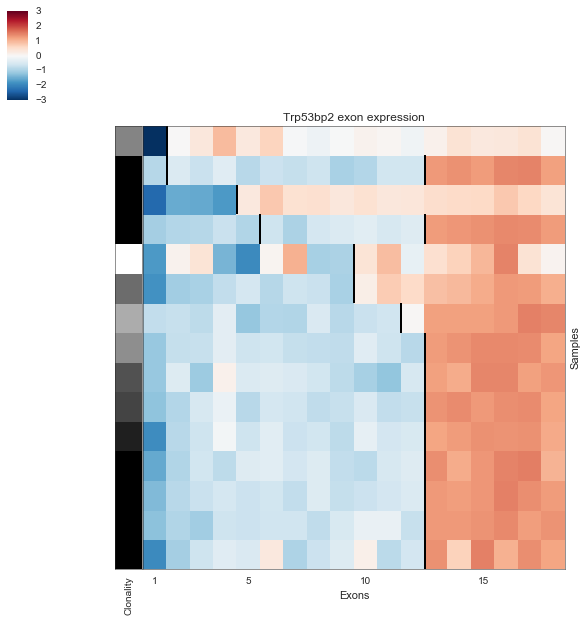

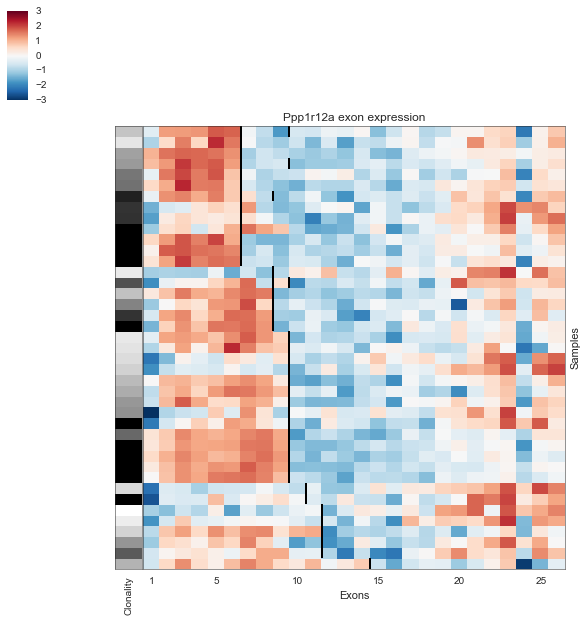

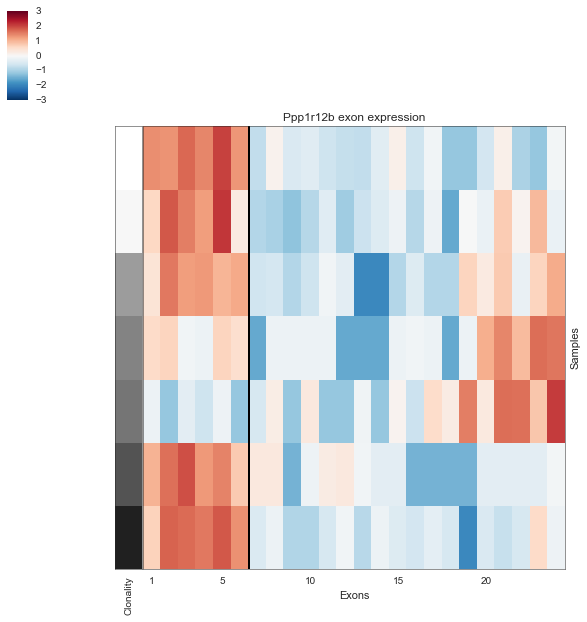

In [153]:
from nbsupport.insertions import plot_exon_expression

shared_kws = {
    'vmax': 3,
    'vmin': -3,
    'insertions': insertions,
    'z_score': 1
}

plot_exon_expression(coverage, gene='Trp53bp2', **shared_kws)
plot_exon_expression(coverage, gene='Ppp1r12a', **shared_kws)
plot_exon_expression(coverage, gene='Ppp1r12b', **shared_kws);

In [163]:
with sns.plotting_context('paper', font_scale=0.7):
    cm = plot_exon_expression(coverage, gene='Ppp1r12b', 
                              figsize=(4, 1.28), **shared_kws)
    cm.savefig('../reports/figures/fig_5_ppp1r12b_expr.pdf', bbox_inches='tight')
    plt.close(cm.fig)

    cm = plot_exon_expression(coverage, gene='Ppp1r12a',
                              figsize=(4, 2.6), **shared_kws)
    cm.savefig('../reports/figures/fig_5_ppp1r12a_expr.pdf', bbox_inches='tight')
    plt.close(cm.fig)

    cm = plot_exon_expression(coverage, gene='Trp53bp2',
                              figsize=(4, 1.45), **shared_kws)
    cm.savefig('../reports/figures/fig_5_trp53bp2_expr.pdf', bbox_inches='tight')
    plt.close(cm.fig)